In [46]:
# Reads annotators' results
import os
import pandas as pd
import spacy
data_path='/Users/polybahn/Desktop/cardinaldl/evaluation/annotator results new/human/'
files = [os.path.join(data_path, p) for p in os.listdir(data_path) if p.endswith('.csv')]

In [47]:
print(files)

['/Users/polybahn/Desktop/cardinaldl/evaluation/annotator results new/human/data-emma - data.csv', '/Users/polybahn/Desktop/cardinaldl/evaluation/annotator results new/human/data-julya - data.csv', '/Users/polybahn/Desktop/cardinaldl/evaluation/annotator results new/human/data-adele - data.csv']


In [48]:
df = pd.read_csv(files[0])
actions = df['action block 1'].tolist()
contexts = df['context'].tolist()
print(len(actions))
print(len(contexts))
texts = [c+'\n'+a for a,c in zip(actions, contexts)]
print(texts[0])

500
500
...A HAND.
She lets the insect crawl up her arm. Wiggles into her workings. It tickles.


In [49]:
oris = [os.path.join('/Users/polybahn/Desktop/test/', p) for p in os.listdir('/Users/polybahn/Desktop/test')]
dics = [os.path.join('/Users/polybahn/Desktop/test_coref', p) for p in os.listdir('/Users/polybahn/Desktop/test_coref')]
lookup = list()
mapping = list()
for ori,dic in zip(oris, dics):
    with open(ori, 'r') as o, open(dic, 'r') as d:
        ot = o.readlines()
        dt = d.readlines()
        lookup += ot
        mapping += dt
print(len(lookup))
print(lookup[0])

OSError: [Errno 2] No such file or directory: '/Users/polybahn/Desktop/test_coref'

In [50]:
def look_up(string):
    string = string.replace("'", '"').strip()
    for i in range(len(lookup)):
        if string in lookup[i].replace("'", '"'):
            return mapping[i].split('\t')[1].strip()
    print(string)
    return None

In [31]:
def reverse_look_up(string):
    for i in range(len(mapping)):
        if string in mapping[i]:
            return lookup[i].replace("'", '"').split('\t')[1].strip()
    print(string)
    return None

In [32]:
def simp_look(string):
    for i in range(len(lookup)):
        if string in lookup[i].replace("'", '"'):
            return True
    return False

In [33]:
for action in actions:
    pass
#     print(look_up(action))
        

In [34]:
import json
with open('/Users/polybahn/Desktop/cardinaldl/evaluation/system results/500.txt') as f:
    data = json.load(f)
data

[{u'action': u'give',
  u'duration': 2,
  u'emotion': u'',
  u'errors': u'',
  u'manner': None,
  u'modifierDirection': u'',
  u'modifierLocation': u'',
  u'ori_action': None,
  u'owner': None,
  u'partial_start_time': 0,
  u'partial_text': u'Eve lets',
  u'prop': None,
  u'rotation': True,
  u'speed': 0.5,
  u'startTime': 0,
  u'target': None,
  u'text': u'Eve lets the insect crawl up Lowers Eve arm.Wiggles into Eve workings.Wiggles into her workings tickles',
  u'translation': False},
 {u'action': u'crawl',
  u'duration': 2,
  u'emotion': u'',
  u'errors': u'',
  u'manner': None,
  u'modifierDirection': u'up',
  u'modifierLocation': u'',
  u'ori_action': u'crawls',
  u'owner': u'the insect',
  u'partial_start_time': 0,
  u'partial_text': u'the insect crawls up Lowers Eve arm',
  u'prop': None,
  u'rotation': True,
  u'speed': 0.5,
  u'startTime': 0,
  u'target': None,
  u'text': u'Eve lets the insect crawl up Lowers Eve arm.Wiggles into Eve workings.Wiggles into her workings tickles'

In [35]:
res = dict()
cur = []
key = ''
ori_key = ''
for item in data:
    if not key:
        key = item['text']
        ori_key = reverse_look_up(item['text'])
    if not item['text']  == key: 
        key = item['text']
        res[ori_key] = cur
        ori_key = reverse_look_up(item['text'])
        cur = []
    cur.append(item)
res[ori_key] = cur
print(len(res))

NameError: global name 'mapping' is not defined

In [36]:
for key in res.keys():
    if not simp_look(key):
        print(key)
    

In [37]:
# We use res and it's key to find corresponding row in tester's dataset
for k,v in res.items():
    for i in v:
        i['partial_start_time'] = i['partial_start_time'] - i['startTime']

In [38]:
print(res)

{}


In [39]:
# read YATS results
import json
with open('/Users/polybahn/Desktop/cardinaldl/evaluation/yats/yats.txt') as f:
    yats = json.load(f)
print yats.keys()[10]
print yats['The storm rages. The house is tossed into the storm clouds. All goes black.']
print '\n'

# read sys results
with open('/Users/polybahn/Desktop/cardinaldl/evaluation/system results/new_500.txt') as f:
    for line in f:
        sysout = eval(line)
print sysout[yats.keys()[101]]

A chain of monkeys falls into view, dangling a considerable distance above the ground.
[u'The storm rages.', u' The house is tossed into the storm clouds.', u' All goes black.']


['have Sombody crowds together in front of the " BANK " box.', 'Sombody crowds together in front of the " BANK " box are A GROUP OF TOYS.', 'Andy"s hand lowers a CERAMIC PIGGY BANK in front of Mr. Potato Head.', 'Andy"s hand shakes out a pile of coins to the floor.', 'Mr. Potato Head kisses the coins.']


In [28]:
# 2019.March 4th
# generate valid querys for end2end evaluation. Put into one file.
with open('/Users/polybahn/Desktop/cardinaldl/evaluation/system results/new_500.txt', 'r') as f:
    all_want = json.load(f)

all_queries = []
with open('/Users/polybahn/Desktop/NeuralTextSimplification/data/test.en1', 'wb') as f:
    for key in all_want.keys():
        f.write(key + '\n')
        all_queries.append(key)
        
all_responses = []
# Now run the neural simplification pretrained model.
# After having the result, we construct the similar formated result file as new_500.txt
with open('/Users/polybahn/Desktop/NeuralTextSimplification/results_NTS/result_NTS-w2v_epoch11_10.20.t7_5') as end2end: # w2v model
        for line in end2end:
            cur_resp = [sent.strip()+'.' for sent in line.split('.') if sent.strip()]
            all_responses.append(cur_resp)

neural_res = dict(zip(all_want.keys(), all_responses))
json.dump(neural_res, open('/Users/polybahn/Desktop/cardinaldl/evaluation/system results/neural_500.txt', 'wb'))


In [67]:
neural_res = json.load( open('/Users/polybahn/Desktop/cardinaldl/evaluation/system results/neural_500.txt', 'r'))

In [40]:
# minimum edit distance between two strings
def med(s, t, costs=(1, 1, 1)):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        costs: a tuple or a list with three integers (d, i, s)
               where d defines the costs for a deletion
                     i defines the costs for an insertion and
                     s defines the costs for a substitution
    """
    rows = len(s)+1
    cols = len(t)+1
    deletes, inserts, substitutes = costs
    
    dist = [[0 for x in range(cols)] for x in range(rows)]
    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = row * deletes
    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = col * inserts
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = substitutes
            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + cost) # substitution
#     for r in range(rows):
#         print(dist[r])
    
 
    return dist[row][col]

def min_med(candidate, references):
    min_ref = ''
    min_score = 0
    for ref in references:
        score = med(candidate, ref)
        if not min_ref:
            min_ref = ref
            min_score = score
        if score < min_score:
            min_ref = ref
            min_score = score
    return min_ref



In [41]:
def get_df(path):
    return pd.read_csv(path)

df = get_df(files[0])
df

id                                     action block 1  \
0      1  She lets the insect crawl up her arm. Wiggles ...   
1      2  The wind kicks up. The WARNING LIGHT sounds on...   
2      3               The cockroach watches his master go.   
3      4  ...a PAINT-BOT paints a wall sign... ...A GARB...   
4      5       Her gaze falls on Wall-E. He waves politely.   
5      6  The Captain gives Auto the hand. Sips his coffee.   
6      7  Cut to VARIOUS ASPECTS OF AXIOM LIVING. The li...   
7      8  The Captain stares at a FLASHING BUTTON on the...   
8      9           The Captain looks at his VESTIGIAL LEGS.   
9     10  He manages to turn to the FIRST PAGE OF INSTRU...   
10    11  She paints Wall-E's face with hideous looking ...   
11    12  She is washed and scrubbed. A CIRCULAR BUFFER ...   
12    13  She points to an OVERHEAD SCREEN. It displays ...   
13    14  Pulls on the EMERGENCY EXIT LEVER. The hatch w...   
14    15  She flies towards the debris field, when Wall-...   
15    16  He opens his compactor door. Pulls out the PLA...   
16    17  The two fly around the stern of the ship. Wall...   
17    18  She backs up to wave hello. Bumps into JOHN'S ...   
18    19  Mary leans over to his armrest. Turns off his ...   
19    20  Auto busy operating the ship. Doesn't see Eve ...   
20    21  An aperture opens in the ceiling above. Auto l...   
21    22  Before Wall-E can even protest she is gone. Zo...   
22    23  He looks over to his computer screen. The BEAU...   
23    24                      She looks at her hands again.   
24    25  lowering in front of her. Auto spots the plant...   
25    26  It's over. The plant is gone. But in that froz...   
26    27  Gopher salutes Auto and exits. Auto turns to t...   
27    28  Suddenly, her area is flooded in light. She fl...   
28    29                    M-O speeds towards the airlock.   
29    30                The terrified steward is thrown in.   
..   ...                                                ...   
470  471  She places a stack of towels on his head. Gest...   
471  472  Woody is left lovestruck. All the rest of the ...   
472  473  Bo Peep and Slinky are left alone at the windo...   
473  474  Grabs a large dial. TIME OF DAY ICONS surround...   
474  475  Can be heard approaching from behind the conne...   
475  476  Dug leads Carl 'backstage' through a vent shaf...   
476  477  The Camp Master leads the audience in the WILD...   
477  478  A SQUAD OF CLEANER ROBOTS emerge onto the dock...   
478  479     The footprints continue for a time, then stop.   
479  480  The rejects stop. See the roof of Wall-E's tru...   
480  481  The toys all crowd around the bedroom window, ...   
481  482  Wall-E drives down a deserted overpass. Activa...   
482  483                       Carl walks toward the voice.   
483  484  Buzz's space ranger logo is on the screen over...   
484  485  Woody cowers in the corner as Buzz enters. He ...   
485  486              All the dog pilots snap to attention.   
486  487  EXT. STREET/BACK OF MOVING TRUCK The RC Car be...   
487  488  He sticks a match prominently in Woody's holst...   
488  489  Auto panics. Zips back up through the hole in ...   
489  490  BROKEN TOY SOUNDS emit from behind Woody. He t...   
490  491  Mr. Potato Head and Hamm are playing Battleshi...   
491  492  Eve and Wall-E ride in uncomfortable silence. ...   
492  493  One of the Christmas bulbs moves aside to reve...   
493  494                  Carl saws frantically at the net.   
494  495  The receiving end of the monitor is atop Andy'...   
495  496      Muntz enters the cockpit and takes the wheel.   
496  497              Carl takes his place next to Russell.   
497  498         Woody takes a step forward and then stops.   
498  499  The BNL CEO appears at the end. Waves goodbye ...   
499  500  WALL-E'S HAND appears out of the dust. Calmly ...   

                                               context  \
0                                        

In [54]:
import numpy as np
m = {'simplified sentence ': 'partial_text',
     'partial start time ' : 'partial_start_time',
     'owner ': 'owner',
     'original action ': 'ori_action',
     'most similar action ': 'action',
     'speed ' : 'speed',
     'duration ': 'duration',
     'rotation ': 'rotation',
     'translation ' : 'translation',
     'target ': 'target',
     'prop ' : 'prop',
     'location modifier ': 'modifierLocation',
     'direction modifier ': 'modifierDirection',
     'manner ': 'manner',
     'emotion ': 'emotion'
    }

def construct_dict(df):
    r = dict()
    for index, row in df.iterrows():
        key = row['action block 1'].replace("'", '"')
        l = list()
        for i in range(1, 13):
            i = str(i)
            if not row['original action ' + i] == row['original action ' + i]:
                    break
            obj = dict()
            for k, v in m.items():
                if isinstance(row[k+i], str):
                    assign = row[k+i].lower()
                    if 'null' in assign:
                        continue
                    if assign == 'yes':
                        assign = 'true'
                    if assign == 'no':
                        assign = 'false'
                    if assign == 'short':
                        assign = 1.5
                    if assign == 'neutral':
                        assign = 2
                    if assign == 'long':
                        assign = 4
                    if assign == 'fast':
                        assign = 1
                    if assign == 'neutral':
                        assign = 0.5
                    if assign == 'slow':
                        assign = 0.2
                elif not row[k+i] == row[k+i]:
                    assign = 'null'
                else:
                    assign = row[k+i]
                obj[v] = assign
            l.append(obj)
        if l:
            r[key] = l
    return r            


In [44]:
{"startTime": 1098, 
 "partial_start_time": 1099, 
 "duration": 2, 
 "owner": "Eve 's hand", 
 "target": null,
 "prop": null,
 "action": "collect", 
 "ori_action": "takes", 
 "manner": "Calmly",
 "speed": 0.5, 
 "translation": false, 
 "rotation": false, 
 "errors": "", 
 "modifierLocation": "", 
 "modifierDirection": "", 
 "emotion": "Calmly",
 "text": "EVE.WALL-E'S HAND appears out of the dust.Calmly takes Eve's hand",
 "partial_text": "Calmly takes Eve's hand"}

NameError: name 'null' is not defined

In [58]:
testers = dict()
for file in files:
    name = file.split('-')[-2].strip()
    print name
    df = get_df(file)
    testers[name] = construct_dict(df)

emma
julya
adele


In [60]:
print(testers['julya'])

{'Carl GIGGLES with glee.': [{'emotion': 'glee', 'target': 'null', 'duration': 1.5, 'modifierDirection': 'null', 'owner': 'carl', 'prop': 'null', 'action': 'laugh', 'ori_action': 'giggles', 'manner': 'with glee', 'modifierLocation': 'null', 'partial_start_time': '0', 'rotation': 'true', 'speed': 2, 'translation': 'false', 'partial_text': 'carl giggles with glee.'}], 'A chain of monkeys falls into view, dangling a considerable distance above the ground.': [{'emotion': 'null', 'target': 'null', 'duration': 2, 'modifierDirection': 'above the ground', 'owner': 'chain of monkeys', 'prop': 'null', 'action': 'swing', 'ori_action': 'dangle', 'manner': 'null', 'modifierLocation': 'side of house', 'partial_start_time': '0', 'rotation': 'true', 'speed': 2, 'translation': 'false', 'partial_text': 'a chain of monkeys dangle high above the ground.'}], 'Robot and Snake begin constructing a podium made out of Legos and a Tinker Toy tub while Woody searches the floor.': [{'emotion': 'null', 'target': '

In [61]:
from nltk.translate.bleu_score import sentence_bleu

def calc_bleu(candidate, references):
    if candidate == None:
        return 0
    references = filter(lambda x: x, references)
    score = sentence_bleu([ref.lower().strip('.').strip().split(' ') for ref in references], candidate.lower().strip('.').strip().split(' '), weights=(1, 0, 0, 0))
    return score
    
def extract_simp(json_list):
    return [j['partial_text'] for j in json_list]

def extract_all(key, cand, all_ds):
    res = []
    for k,v in all_ds.items():
        if key in v and len(v[key]) > 0:
            ref = min_med(cand, extract_simp(v[key]))
            print(ref)
            res.append(ref)
    return res



def extract_all_triple(field, key, cand, all_ds):
    res = []
    for k,v in all_ds.items():
        if key in v and len(v[key]) > 0:
            ref = min_med(cand, extract_simp(v[key]))
            for item in v[key]:
                if item['partial_text'] == ref:
                    if field not in item or not item[field]:
                        continue
                    res.append([k, key+cand, item[field]])
    return res

def extract_all_other(field, key, cand, all_ds):
    res = []
    for k,v in all_ds.items():
        if key in v and len(v[key]) > 0:
            ref = min_med(cand, extract_simp(v[key]))
            for item in v[key]:
                if item['partial_text'] == ref:
                    if field not in item or not item[field]:
                        continue
#                     try:
                    if isinstance(item[field], str):
                        assign = item[field].strip()
                        if assign == 'fast':
                            item[field] = 1
                        if assign == 'neutral':
                            item[field] = 2
                        if assign == 'slow':
                            item[field] = 0.2
                        if assign == 'true':
                            item[field] = True
                        if assign == 'false':
                            item[field] = False
                    res.append(item[field])
#                     except AttributeError:
#                         print(item[field])
                    break
    return res

In [40]:
the_other_3= dict()
name = 'julya'
now = testers[name]
for k,v in testers.items():
    if not k == name:
        the_other_3[k] = v
print(len(the_other_3))

3


In [62]:
cnt = 0
score_sum = 0
field = 'duration'
for k, v in res.items():
#     print(k)
    temp_sum = .0
    temp_cnt = 0
    for cand in v:
        if field not in cand :
            continue
#         if cand[field] == 0.5:
#             cand[field] = 2
        references = extract_all_other(field, k, cand['partial_text'], testers)
        if not references:
            continue
#         temp_sum += calc_bleu(cand[field].lower(), references) # used for textual fields
        correct = 0
        print(cand[field], references)
        print(cand['partial_text'])
        for ref in references:
            if cand[field] == ref:
                correct = 1
                break
        temp_sum += correct
        temp_cnt += 1
    if temp_sum > 0:
#         print(temp_sum/temp_cnt)
        score_sum += temp_sum/temp_cnt
        cnt += 1
print(cnt)
print(score_sum/cnt)

0


ZeroDivisionError: integer division or modulo by zero

In [63]:
# redefine bleu
from nltk.translate.bleu_score import sentence_bleu

def extract_all(key, cand, all_ds):
    res = []
    for k,v in all_ds.items():
        if key in v and len(v[key]) > 0:
            ref = extract_simp(v[key])
            print(ref)
            res += ref
    return res


def calc_bleu(candidate, references):
    if candidate == None:
        return 0
    references = filter(lambda x: x, references)
    score = sentence_bleu([ref.lower().strip('.').strip().split(' ') for ref in references], candidate.lower().strip('.').strip().split(' '))
    return score

In [64]:
# Eval for our system
cnt = 0
score_sum = 0
for k, v in sysout.items():
    print(k)
    candidates= v
    temp_sum = .0
    temp_cnt = 0
    for cand in candidates:
        print('cand: ' + cand)
        references = extract_all(k, cand, testers)
        if not references:
            continue
        temp_sum += calc_bleu(cand, references)
        temp_cnt += 1
#     if temp_sum > 0:
#     print(temp_sum/temp_cnt)
    score_sum += temp_sum
    cnt += temp_cnt
print(cnt)
print(score_sum/cnt)

Carl GIGGLES with glee.
cand: Carl GIGGLES with glee.
['carl giggles with glee.']
['carl giggles with glee']
['carl giggles with glee.']
A chain of monkeys falls into view, dangling a considerable distance above the ground.
cand: A chain of monkeys falls into view.
['a chain of monkeys fall into view.', 'the chain of monkeys dangle a considerable distance above ground.']
['a chain of monkeys appears', 'a chain of monkeys dangles a far above the ground']
['a chain of monkeys dangle high above the ground.']
cand: A chain of monkeys dangles a considerable distance above the ground.
['a chain of monkeys fall into view.', 'the chain of monkeys dangle a considerable distance above ground.']
['a chain of monkeys appears', 'a chain of monkeys dangles a far above the ground']
['a chain of monkeys dangle high above the ground.']
Robot and Snake begin constructing a podium made out of Legos and a Tinker Toy tub while Woody searches the floor.
cand: Woody searches the floor.
['robot constructs a p

/anaconda2/lib/python2.7/site-packages/nltk/translate/bleu_score.py:472: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/anaconda2/lib/python2.7/site-packages/nltk/translate/bleu_score.py:472: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/anaconda2/lib/python2.7/site-packages/nltk/translate/bleu_score.py:472: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



['carl sits on a curb.', 'russell sits on a curb.', 'carl licks an ice cream cone.', 'russell licks an ice cream cone.', 'cars pass by.']
['carl sits on a curb', 'russell sits on a curb', 'carl licks a ice cream cone', 'russell licks ice cream cones', 'cars pass by']
['carl sits on the curb.', 'russell sits on a curb.', 'carl is licking an ice cream cone.', 'russell is licking an ice cream cone.', 'cars pass by them.']
cand: Russell has chocolate.
['carl sits on a curb.', 'russell sits on a curb.', 'carl licks an ice cream cone.', 'russell licks an ice cream cone.', 'cars pass by.']
['carl sits on a curb', 'russell sits on a curb', 'carl licks a ice cream cone', 'russell licks ice cream cones', 'cars pass by']
['carl sits on the curb.', 'russell sits on a curb.', 'carl is licking an ice cream cone.', 'russell is licking an ice cream cone.', 'cars pass by them.']
cand: Russell has butter - brickle.
['carl sits on a curb.', 'russell sits on a curb.', 'carl licks an ice cream cone.', 'ru

cand: Sid groggily sits up for a beat.
["an alarm clock goes off by sid's bed.", 'woody drops back under the toolbox.', 'buzz goes limp.', 'sid groggily sits up.', "sid's eyes light up."]
["it goes off by sid's bed", 'woody drops back under the toolbox', 'buzz goes limp', 'sid groggily sits up for a beat', 'his eyes light up']
["the alarm clock sounds by sid's bed.", 'woody drops back under the toolbox.', 'buzz goes limp.', 'sid groggily sits up for a beat.', "sid's eyes open."]
cand: his eyes light up.
["an alarm clock goes off by sid's bed.", 'woody drops back under the toolbox.', 'buzz goes limp.', 'sid groggily sits up.', "sid's eyes light up."]
["it goes off by sid's bed", 'woody drops back under the toolbox', 'buzz goes limp', 'sid groggily sits up for a beat', 'his eyes light up']
["the alarm clock sounds by sid's bed.", 'woody drops back under the toolbox.', 'buzz goes limp.', 'sid groggily sits up for a beat.', "sid's eyes open."]
Just then, Buzz catches sight of his ripped pa

["woody jumps up onto andy's bed.", 'woody turns to the sargent on the nightstand.']
["woody jumps up onto andy's bed", 'woody turns to the sargent on the nightstand']
["woody jumps up on andy's bed.", 'woody turns to the sargent on the nightstand.']
A bottom of wall insulation is pushed aside to reveal Ducky and Legs. They make their way towards a junction box sitting in the center of the floor. Ducky and Legs lift the loose junction box.
cand: Sombody pushes A bottom of wall insulation aside.
['a bottom of wall insulation is pushed aside.', 'ducky is revealed behind the wall insulation.', 'legs is revealed behind the wall insulation.', "ducky makes ducky's way towards a junction box in the center of the floor.", "legs makes legs' way towards a junction box in the center of the floor.", 'ducky lifts the loose junction box.', 'legs lifts the loose junction box.']
['ducky makes his way towards a junction box', 'legs makes his way towards a junction box', 'ducky lifts the loose junction 

cand: Carl collects motions.
["carl spits carl's false teeth at muntz.", 'muntz falls backwards.', "carl collects carl's teeth.", 'carl motions for kevin.']
['carl spits his false teeth at muntz', 'he falls backwards', 'carl collects his teeth', 'carl motions for kevin']
['carl spits his false teeth at muntz.', 'muntz falls backward.', 'carl collects his teeth.', 'carl motions for kevin.']
Woody turns around and ducks just in time as a car passes over him. Shaken, Woody tries to get up again when...
cand: as a car passes.
['woody turns around.', 'woody ducks just in time.', 'a car passes over woody.', 'woody tries to get up again when...']
['woody turns around', 'woody ducks just in time', 'a car passes over him', 'shaken, woody tries to get up again']
['woody turns around.', 'woody ducks just in time.', 'a car passes over woody.', 'shaken, woody tries to get up again.']
cand: Woody turns around time.
['woody turns around.', 'woody ducks just in time.', 'a car passes over woody.', 'woo

Sid crosses to the window to see a huge rainstorm commence. Sullenly, he smacks his head against the window.
cand: Sid crosses to the window.
['sid crosses to the window.', 'sid sees a huge rainstorm.', "sullenly, sid smacks sid's head against the window."]
['sid crosse to the window', 'sullenly, he smacks his head against the window']
['sid crosses to the window.', 'sid looks at the huge rainstorm.', 'sullenly, sid smacks his head against the window.']
cand: Sid sees a huge rainstorm commence.
['sid crosses to the window.', 'sid sees a huge rainstorm.', "sullenly, sid smacks sid's head against the window."]
['sid crosse to the window', 'sullenly, he smacks his head against the window']
['sid crosses to the window.', 'sid looks at the huge rainstorm.', 'sullenly, sid smacks his head against the window.']
cand: Sullenly he smacks his head against the window.
['sid crosses to the window.', 'sid sees a huge rainstorm.', "sullenly, sid smacks sid's head against the window."]
['sid crosse t

['hannah exits the room.', 'buzz keels over face-down onto the table.', 'hannah passes woody.', 'woody hides in the christmas lights.', 'hannah walks downstairs.']
['hannah exits the room', 'buzz keels over face-down onto the table', 'hannah passes woody', 'hannah walks downstairs']
['hannah exits the room.', 'buzz keels over face-down onto the table.', 'woody is hidden in the christmas lights.', 'hannah walks downstairs past woody.']
cand: Woody  hides in the Christmas lights.
['hannah exits the room.', 'buzz keels over face-down onto the table.', 'hannah passes woody.', 'woody hides in the christmas lights.', 'hannah walks downstairs.']
['hannah exits the room', 'buzz keels over face-down onto the table', 'hannah passes woody', 'hannah walks downstairs']
['hannah exits the room.', 'buzz keels over face-down onto the table.', 'woody is hidden in the christmas lights.', 'hannah walks downstairs past woody.']
cand: Hannah passes Woody.
['hannah exits the room.', 'buzz keels over face-do

cand: Once the children are..
['mrs. davis goes out of sight.', 'the children go out of sight.', 'the sargent motions to his men with a silent hand signal.', 'a paratrooper jumps out through the railing.', 'a paratrooper jumps out through the railing.', 'a paratrooper parachutes down to the floor below.', 'a paratrooper parachutes down to the floor below.']
['the sargent motions to his men with a silent hand signal', 'two paratroopers jump out through the railing', 'two paratroopers parachuting down to the floor below']
['mrs. davis leaves the room.', 'the children leave the room.', 'sargent motions to his men with a silent hand signal.', 'two paratroopers jump out through the railing.', 'two paratroops parachute down to the floor below.']
cand: TWO PARATROOPERS jump out through the railing.
['mrs. davis goes out of sight.', 'the children go out of sight.', 'the sargent motions to his men with a silent hand signal.', 'a paratrooper jumps out through the railing.', 'a paratrooper jumps 

Alpha, Gamma and Beta walk into the dirigible. Dug sits forlornly with a PLASTIC CONE around his neck.
cand: Alpha  walks into the dirigible..
['alpha walks into the dirigible.', 'gamma walks into the dirigible.', 'beta walks into the dirigible.', "dug sits forlornly with a plastic cone around dug's neck."]
['alpha walks into the dirigible', 'gamma walks into the dirigible', 'beta walks into the dirigible', 'dug sits forlornly with a plastic cone around his neck']
['alpha walks into the dirigible.', 'gamma walks into the dirigible.', 'beta walks into the dirigible.', 'dug sits forlornly with a plastic cone around his neck.']
cand: Gamma walk into the dirigible.
['alpha walks into the dirigible.', 'gamma walks into the dirigible.', 'beta walks into the dirigible.', "dug sits forlornly with a plastic cone around dug's neck."]
['alpha walks into the dirigible', 'gamma walks into the dirigible', 'beta walks into the dirigible', 'dug sits forlornly with a plastic cone around his neck']
['al

cand: Buzz leaps into the crane game through the " PRIZE " slot..
['woody turns.', 'woody realizes buzz is gone.', 'woody looks across the way.', 'woody sees buzz.', "buzz leaps into the crane game through the 'prize' slot."]
['woody turns', 'he looks across the way', "buzz leaps into the crane game through the 'prize' slot", 'woody sees buzz']
['woody realizes buzz is gone.', 'woody looks across the way.', 'buzz leaps into the crane game through the prize slot.']
Buzz is stricken. He looks down at his wrist communicator and opens it.
cand: Sombody strickens Buzz.
["buzz looks down at buzz's wrist communicator.", "buzz opens buzz's wrist communicator."]
['he looks down at his wrist communicator', 'and he opens it']
['buzz is stricken.', 'buzz looks down at his wrist communicator.', 'buzz opens his wrist communicator.']
cand: He looks down at his wrist communicator.
["buzz looks down at buzz's wrist communicator.", "buzz opens buzz's wrist communicator."]
['he looks down at his wrist co

cand: the Captain fights Auto.
["gopher drops out of gopher's pneumatic tube.", 'gopher sees the captain fighting auto.', 'gopher charges at the captain.', 'the captain kicks the gopher.', 'gopher goes straight out of the window.']
['gopher drops out of his pneumatic tube', 'gopher sees the captain', 'gopher sees auto', 'the captain fights auto', 'charges at the captain', 'who kicks him straight out the window']
['gopher drops out of his pneumatic tube.', 'gopher sees the captain.', 'the captain is fighting auto.', 'gopher charges at the captain.', 'the captain kicks gopher out the window.']
cand: Charges at the Captain.
["gopher drops out of gopher's pneumatic tube.", 'gopher sees the captain fighting auto.', 'gopher charges at the captain.', 'the captain kicks the gopher.', 'gopher goes straight out of the window.']
['gopher drops out of his pneumatic tube', 'gopher sees the captain', 'gopher sees auto', 'the captain fights auto', 'charges at the captain', 'who kicks him straight out

cand: He checks the balloons.
['the house turns.', 'carl looks out the window, satisfied.', 'carl checks the balloons.']
['the house turns', 'carl looks out the window, satisfied', 'he checks the balloons']
['the house turns.', 'carl looks out the window, satisfied.', 'carl checks the balloons']
Surprised at Dug"s moxy, Alpha sits. All other dogs sit too.
cand: Alpha sits.
["surprised at dug's moxy, alpha sits.", 'all other dogs sit too.']
['surprised, alpha sits', 'all the other dogs sit too']
["surprised at dug's moxy, alpha sits.", 'all other dogs sit too.']
cand: Alpha surprises.
["surprised at dug's moxy, alpha sits.", 'all other dogs sit too.']
['surprised, alpha sits', 'all the other dogs sit too']
["surprised at dug's moxy, alpha sits.", 'all other dogs sit too.']
cand: All other dogs sit too.
["surprised at dug's moxy, alpha sits.", 'all other dogs sit too.']
['surprised, alpha sits', 'all the other dogs sit too']
["surprised at dug's moxy, alpha sits.", 'all other dogs sit to

cand: Woody looks through him.
['woody turns to lenny, a pair of wind-up binoculars.', 'lenny approaches woody from the other end of the desk.', 'woody picks lenny up.', 'woody looks through lenny to survey the scene.']
['woody turns', 'lenny approaches him from the other end of the desk', 'woody picks lenny up', 'woody looks through him', 'woody surveys the scene']
['woody turns to see lenny.', 'lenny is approaching woody from the other end of the desk.', 'woody picks lenny up.', 'woody looks through lenny to survey the scene.']
Russell points up to the roof of Carl"s house.
cand: Russell points up to the roof of Carl"s house.
["russell points up to the roof of carl's house."]
["russell points up to the roof of carl's house"]
["russell points up to the roof of carl's house."]
Woody picks up Buzz"s severed arm.
cand: Woody picks up Buzz"s severed arm.
["woody picks up buzz's severed arm."]
["woody picks up buzz's severed arm"]
["woody picks up buzz's severed arm."]
Rex looks over at RC

In [65]:
# Eval for YATS
cnt = 0
score_sum = 0
for k, v in yats.items():
    print(k)
    candidates= v
    temp_sum = .0
    temp_cnt = 0
    for cand in candidates:
        print('cand: ' + cand)
        references = extract_all(k, cand, testers)
        if not references:
            continue
        temp_sum += calc_bleu(cand, references)
        temp_cnt += 1
#     if temp_sum > 0:
#     print(temp_sum/temp_cnt)
    score_sum += temp_sum
    cnt += temp_cnt
print(cnt)
print(score_sum/cnt)

Carl GIGGLES with glee.
cand: Carl GIGGLES with mirth.
['carl giggles with glee.']
['carl giggles with glee']
['carl giggles with glee.']
The storm rages. The house is tossed into the storm clouds. All goes black.
cand: The storm rages.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
cand:  The house is tossed into the storm clouds.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
cand:  All goes black.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
Robot and Snake begin co

cand:  His server can " t refuses and eats a bite.
["russell's waiter servers russell a hot dog.", "russell's waiter eats a bite."]
['somebody serves russell a hot dog', 'his waiter eats a bite']
['russell is served a hot dog.', "russell's waiter eats a bite of the hot dog."]
Muntz is about to throw a switch when he looks out the porthole. Flying toward him is CARL"S HOUSE!
cand: Muntz is about to throw a switch when he looks out the port.
['muntz is about to throw a switch.', 'muntz looks out the porthole.', "carl's house flies towards muntz!"]
['muntz looks out the window', "carl's house flies toward him"]
['muntz is about to throw a switch.', 'muntz looks out the porthole.', "carl's house is flying toward muntz."]
cand:  Flying toward him is CARL " S HOUSE!.
['muntz is about to throw a switch.', 'muntz looks out the porthole.', "carl's house flies towards muntz!"]
['muntz looks out the window', "carl's house flies toward him"]
['muntz is about to throw a switch.', 'muntz looks out t

["carl studies russell's sad optimism.", "carl looks at the missing badge on russell's sash."]
cand:  He looks at the missing badge on Russell " s sash.
["carl studies russell's sad optimism.", "carl looks at the missing badge on russell's sash."]
["carl studies russell's sad optimism", "he looks at russell's  sash"]
["carl studies russell's sad optimism.", "carl looks at the missing badge on russell's sash."]
lowering in front of her. Auto spots the plant in the Captain"s hand. "A113" flashes on Auto"s lens.
cand: lowering in front of her.
['auto lowers in front of her.', "auto spots the plant in the captain's hand.", "a113' flashes on auto's lens."]
['lowering in front of her', "auto spots the plant in the captain's hand", "a113' flashes on auto's lens"]
['auto is lowering in front of her.', "auto spots the plant in the captain's hand.", "a113  flashes on auto's lens."]
cand:  Car spots the plant in the Captain " s hand.
['auto lowers in front of her.', "auto spots the plant in the c

cand:  He turned on them! Dug shamefully lowers his head.
['carl looks at dug.', 'russell looks at dug.', "dug shamefully lowers dug's head."]
['carl looks at dug', 'russell looks at dug', 'dug shamefully lowers his head']
['carl looks at dug.', 'russell looks at dug.', 'dug turned on them!', 'dug shamefully lowers his head.']
Another dog pours some juice then takes a big slurp from his glass.
cand: Another dog pours some juice then takes a big slurp from his glass.
['another dog pours some juice.', "the dog takes a big slurp from russell's glass."]
['another dog pours some juice', 'then takes a big slurp from his glass']
['another dog pours some juice.', 'another dog slurps from his glass.']
Woody leaps to his feet, runs across the room, and catches the door just before it closes. As he swings the door back open Woody is confronted by...
cand: Woody leaps to his feet.
["woody leaps to woody's feet.", 'woody runs across the room.', 'woody catches the door.', 'woody swings the door back

cand:  Some bushes whisper below.
["rex points a flashlight out of andy's bedroom window.", 'bo peep looks on.', 'slinky looks on.', 'hamm looks on.', 'potato head looks on.', 'some bushes rustle below.']
["rex points a flashlight out of andy's bedroom window", 'bo looks on', 'peep looks on', 'slinky looks on', 'hamm looks on', 'potato head looks on', 'some bushes rustle below']
["rex points a flashlight out of andy's bedroom window.", 'bo peep looks toward the beam.', 'slinky looks toward the beam.', 'hamm looks toward the beam', 'potato head looks toward the beam.', 'some bushes rustle below.']
The front doors automatically swing open as the people pass through. Suddenly two pieces of trash a burger container and "MEGA-GULP" cup stand up.
cand: The front doors automatically swing open as the people pass through.
['the front doors automatically open.', 'people pass through.', 'suddenly a burger container stands up.', "suddenly a 'mega-gulp' cup stands up."]
['people pass through', 'th

cand:  Dug jumps up on it.
['the bird shakes dug off its leg.', "dug jumps up on to the bird's leg."]
['the bird tries to shake dug off its leg', 'dug jumps up on it']
['the bird tries to shake dug off its leg.', 'dug jumps up on the bird.']
Eve and Wall-E ride in uncomfortable silence. Their "WANTED" IMAGE plays on an elevator screen.
cand: Eve and Wall- E ride in uncomfortable silence.
['eve rides in uncomfortable silence.', 'wall-e rides in uncomfortable silence.', "eve and wall-e's 'wanted' image plays on an elevator screen."]
['eve rides silently', 'wall-e rides silently']
['eve rides in uncomfortable silence.', 'wall-e rides in uncomfortable silence.', 'their wanted image plays on an elevator screen.']
cand:  Their " WANTED " IMAGE plays on an elevator screen.
['eve rides in uncomfortable silence.', 'wall-e rides in uncomfortable silence.', "eve and wall-e's 'wanted' image plays on an elevator screen."]
['eve rides silently', 'wall-e rides silently']
['eve rides in uncomfortable 

The Captain struggles to keep control of the steering wheel. Fights the G-forces.
cand: The Captain fights to keep control of the steering wheel.
['the captain struggles to control the steering wheel.', 'the captain fights the g-forces.']
['the captain struggles to keep control of the steering wheel', 'fights the g-forces']
['the captain struggles to control the steering wheel.', 'the captain fights the g-forces.']
cand:  Fights the G- forces.
['the captain struggles to control the steering wheel.', 'the captain fights the g-forces.']
['the captain struggles to keep control of the steering wheel', 'fights the g-forces']
['the captain struggles to control the steering wheel.', 'the captain fights the g-forces.']
Pulls on the EMERGENCY EXIT LEVER. The hatch won"t open!
cand: Pulls on the EMERGENCY EXIT LEVER.
['pulls on the emergency exit lever.']
['pulls on the emergency exit lever']
['pulls on the lever.', 'the hatch will not open.']
cand:  The covers won " t open!.
['pulls on the emer

cand:  He goes into the woods carrying a small shovel in one hand and a pile of leaves in another.
["somehow energized, russell jams his pack into carl's hands.", "russell secures russell's rope to a tree.", 'russell tromps off into the shrubs.', 'russell goes into the woods.', 'russell carries a small shovel in one hand.', 'russell carries a pile of leaves in the other hand.']
["somehow energized, russell jams his pack into carl's hands", 'russell secures his rope to a tree', 'russell tromps off into the scrubs', 'he goes into the woods', 'he carries a small shovel in one hand', 'he carries a pile of leaves in another']
["somehow energized, russell jams his pack into carl's hands.", 'russell secures his rope to a tree.', 'russell tromps off into the shrubs.', 'russell is carrying a small shovel.', 'russell is carrying a pile of leaves in the other hand.']
Gopher drops out of his pneumatic tube. Sees the Captain fighting Auto. Charges at the Captain... ...who kicks him straight out the

['the toys stand still.', "sid's hand grabs the alien out of the backpack.", "sid places the alien sideways along scud's snout."]
cand:  The alien is then placed sideways along Scud " s snout.
['the toys go still.', "sid's hand grabs the alien out of the backpack.", "the alien is placed sideways along scud's snout."]
['the toys go still', "sid's hand grabs the alien out of the backpack", "sid places the alien sideways along scud's snout"]
['the toys stand still.', "sid's hand grabs the alien out of the backpack.", "sid places the alien sideways along scud's snout."]
The Captain looks at his VESTIGIAL LEGS.
cand: The Captain looks at his VESTIGIAL LEGS.
["the captain looks at the captain's vestigial legs."]
['the captain looks at his vestigial legs']
['the captain looks at his vestigial legs.']
Russell runs down the block clapping and calling.
cand: Russell runs down the block clapping and calling.
['russell runs down the block.', 'russell claps.', 'russell calls.']
['russell runs down 

In [68]:
# Eval for neural end2end system
cnt = 0
score_sum = 0
for k, v in neural_res.items():
    print(k)
    candidates= v
    temp_sum = .0
    temp_cnt = 0
    for cand in candidates:
        print('cand: ' + cand)
        references = extract_all(k, cand, testers)
        if not references:
            continue
        temp_sum += calc_bleu(cand, references)
        temp_cnt += 1
#     if temp_sum > 0:
#     print(temp_sum/temp_cnt)
    score_sum += temp_sum
    cnt += temp_cnt
print(cnt)
print(score_sum/cnt)

Carl GIGGLES with glee.
cand: Carl GIGGLES with glee.
['carl giggles with glee.']
['carl giggles with glee']
['carl giggles with glee.']
The storm rages. The house is tossed into the storm clouds. All goes black.
cand: The storm rages.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
cand: The house is tossed into the storm clouds.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
cand: All goes black.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
Carl and Russell hold and c

cand: The bird follows, eating.
['carl pulls the house through the mist.', 'russell pulls the house through the mist.', "russell discreetly drops chocolate pieces along carl and russell's trail.", 'the bird follows the trail.', 'the bird eats the chocolate pieces.']
['carl pulls the house through the mist', 'russell pulls the house through mist', 'russell discreetly drops chocolate pieces along their trail', 'the bird follows', 'the bird eats']
['the house flies through the mist.', 'russells drops chocolate pieces along their trail.', 'the bird follows the chocolate pieces.', 'the bird eats the chocolate pieces.']
cand: eating.
['carl pulls the house through the mist.', 'russell pulls the house through the mist.', "russell discreetly drops chocolate pieces along carl and russell's trail.", 'the bird follows the trail.', 'the bird eats the chocolate pieces.']
['carl pulls the house through the mist', 'russell pulls the house through mist', 'russell discreetly drops chocolate pieces alon

cand: Buzz lifts his head and turns lifelessly to look at Woody.
['woody picks up a stray washer from the desktop.', 'woody flings the stray washer at buzz.', "the stray washer strikes buzz's helmet.", "buzz lifts buzz's head.", 'buzz turns lifelessly.', 'buzz looks at woody.']
['woody picks up a stray washer from the desktop', 'woody flings it at buzz', 'the stray washer strikes his helmet', 'buzz lifts his head', 'buzz turns lifelesslyn to woody']
['woody picks up a washer from the desktop.', 'woody flings a washer at buzz.', 'buzz lifts his head.', 'buzz turns lifelessly toward woody.']
The Sargent pops out of the army bucket next to Woody.
cand: The Sargent pops out of the army bucket next to Woody.
['the sargent pops out of the army bucket next to woody.']
['the sargent pops out of the army bucket next to woody']
['the sargent pops out of the army bucket next to woody.']
Carl stands beside Russell at the window. Russell"s fall had been a daydream.
cand: Carl stands beside Russell 

cand: Muntz follows up.
['carl climbs the work ladder up the side of the dirigible.', 'carl pushes the bird along.', 'muntz follows up.']
['carl climbs the work ladder up the side of the dirigible', 'he pushes the bird along', 'muntz follows up']
['carl climbs the work ladder up the side of the dirigible.', 'carl pushes the bird along as he goes.', 'muntz follows up']
cand: Muntz.
['carl climbs the work ladder up the side of the dirigible.', 'carl pushes the bird along.', 'muntz follows up.']
['carl climbs the work ladder up the side of the dirigible', 'he pushes the bird along', 'muntz follows up']
['carl climbs the work ladder up the side of the dirigible.', 'carl pushes the bird along as he goes.', 'muntz follows up']
Buzz walks off.
cand: Buzz walks off.
['buzz walks off.']
['buzz walks off']
['buzz walks off.']
Woody spots the doodle pad on the floor by the desk and walks over to it. As he reaches down to pick it up... REX, the plastic dinosaur, jumps out to scare Woody.
cand: Woo

['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody thinks.
['woody thinks.']
['woody thinks']
['woody thinks']
cand: Woody 

Everyone rushes to the fallen monitor. Potato Head tries to correctly insert the batteries.
cand: Everyone rushes to the fallen monitor.
['everyone rushes to the fallen monitor.', "potato head inserts the monitor's batteries."]
['everyone rushes to the fallen monitor', 'potato head tries to correctly insert the batteries']
['everyone rushes to the fallen monitor.', 'potato head tries to correctly insert the batteries.']
cand: Potato Head tries to correctly insert the batteries.
['everyone rushes to the fallen monitor.', "potato head inserts the monitor's batteries."]
['everyone rushes to the fallen monitor', 'potato head tries to correctly insert the batteries']
['everyone rushes to the fallen monitor.', 'potato head tries to correctly insert the batteries.']
ALPHA, a Doberman pinscher, sits with his back to them.
cand: ALPHA, a Doberman pinscher, sits with his back to them.
["alpha sits with alpha's back to beta.", "alpha sits with alpha's back to gamma."]
['alpha sits with his back t

cand: below.
["rex points a flashlight out of andy's bedroom window.", 'bo peep looks on.', 'slinky looks on.', 'hamm looks on.', 'potato head looks on.', 'some bushes rustle below.']
["rex points a flashlight out of andy's bedroom window", 'bo looks on', 'peep looks on', 'slinky looks on', 'hamm looks on', 'potato head looks on', 'some bushes rustle below']
["rex points a flashlight out of andy's bedroom window.", 'bo peep looks toward the beam.', 'slinky looks toward the beam.', 'hamm looks toward the beam', 'potato head looks toward the beam.', 'some bushes rustle below.']
The front doors automatically swing open as the people pass through. Suddenly two pieces of trash a burger container and "MEGA-GULP" cup stand up.
cand: The front doors automatically swing open as the people pass through.
['the front doors automatically open.', 'people pass through.', 'suddenly a burger container stands up.', "suddenly a 'mega-gulp' cup stands up."]
['people pass through', 'the front doors automat

In [69]:
# =======================================================
#  SARI -- Text Simplification Tunable Evaluation Metric
# =======================================================
#
# Author: Wei Xu (UPenn xwe@cis.upenn.edu)
#
# A Python implementation of the SARI metric for text simplification
# evaluation in the following paper  
#
#     "Optimizing Statistical Machine Translation for Text Simplification"
#     Wei Xu, Courtney Napoles, Ellie Pavlick, Quanze Chen and Chris Callison-Burch
#     In Transactions of the Association for Computational Linguistics (TACL) 2015
# 
# There is also a Java implementation of the SARI metric 
# that is integrated into the Joshua MT Decoder. It can 
# be used for tuning Joshua models for a real end-to-end
# text simplification model. 
#

from __future__ import division
from collections import Counter
import sys



def ReadInFile (filename):
    
    with open(filename) as f:
        lines = f.readlines()
        lines = [x.strip() for x in lines]
    return lines


def SARIngram(sgrams, cgrams, rgramslist, numref):
    rgramsall = [rgram for rgrams in rgramslist for rgram in rgrams]
    rgramcounter = Counter(rgramsall)
	
    sgramcounter = Counter(sgrams)
    sgramcounter_rep = Counter()
    for sgram, scount in sgramcounter.items():
        sgramcounter_rep[sgram] = scount * numref
        
    cgramcounter = Counter(cgrams)
    cgramcounter_rep = Counter()
    for cgram, ccount in cgramcounter.items():
        cgramcounter_rep[cgram] = ccount * numref
	
    
    # KEEP
    keepgramcounter_rep = sgramcounter_rep & cgramcounter_rep
    keepgramcountergood_rep = keepgramcounter_rep & rgramcounter
    keepgramcounterall_rep = sgramcounter_rep & rgramcounter

    keeptmpscore1 = 0
    keeptmpscore2 = 0
    for keepgram in keepgramcountergood_rep:
        keeptmpscore1 += keepgramcountergood_rep[keepgram] / keepgramcounter_rep[keepgram]
        keeptmpscore2 += keepgramcountergood_rep[keepgram] / keepgramcounterall_rep[keepgram]
        #print "KEEP", keepgram, keepscore, cgramcounter[keepgram], sgramcounter[keepgram], rgramcounter[keepgram]
    keepscore_precision = 0
    if len(keepgramcounter_rep) > 0:
    	keepscore_precision = keeptmpscore1 / len(keepgramcounter_rep)
    keepscore_recall = 0
    if len(keepgramcounterall_rep) > 0:
    	keepscore_recall = keeptmpscore2 / len(keepgramcounterall_rep)
    keepscore = 0
    if keepscore_precision > 0 or keepscore_recall > 0:
        keepscore = 2 * keepscore_precision * keepscore_recall / (keepscore_precision + keepscore_recall)


    # DELETION
    delgramcounter_rep = sgramcounter_rep - cgramcounter_rep
    delgramcountergood_rep = delgramcounter_rep - rgramcounter
    delgramcounterall_rep = sgramcounter_rep - rgramcounter
    deltmpscore1 = 0
    deltmpscore2 = 0
    for delgram in delgramcountergood_rep:
        deltmpscore1 += delgramcountergood_rep[delgram] / delgramcounter_rep[delgram]
        deltmpscore2 += delgramcountergood_rep[delgram] / delgramcounterall_rep[delgram]
    delscore_precision = 0
    if len(delgramcounter_rep) > 0:
    	delscore_precision = deltmpscore1 / len(delgramcounter_rep)
    delscore_recall = 0
    if len(delgramcounterall_rep) > 0:
    	delscore_recall = deltmpscore1 / len(delgramcounterall_rep)
    delscore = 0
    if delscore_precision > 0 or delscore_recall > 0:
        delscore = 2 * delscore_precision * delscore_recall / (delscore_precision + delscore_recall)


    # ADDITION
    addgramcounter = set(cgramcounter) - set(sgramcounter)
    addgramcountergood = set(addgramcounter) & set(rgramcounter)
    addgramcounterall = set(rgramcounter) - set(sgramcounter)

    addtmpscore = 0
    for addgram in addgramcountergood:
        addtmpscore += 1

    addscore_precision = 0
    addscore_recall = 0
    if len(addgramcounter) > 0:
    	addscore_precision = addtmpscore / len(addgramcounter)
    if len(addgramcounterall) > 0:
    	addscore_recall = addtmpscore / len(addgramcounterall)
    addscore = 0
    if addscore_precision > 0 or addscore_recall > 0:
        addscore = 2 * addscore_precision * addscore_recall / (addscore_precision + addscore_recall)
    
    return (keepscore, delscore_precision, addscore)
    

def SARIsent (ssent, csent, rsents) :
    numref = len(rsents)	

    s1grams = ssent.lower().split(" ")
    c1grams = csent.lower().split(" ")
    s2grams = []
    c2grams = []
    s3grams = []
    c3grams = []
    s4grams = []
    c4grams = []
 
    r1gramslist = []
    r2gramslist = []
    r3gramslist = []
    r4gramslist = []
    for rsent in rsents:
        r1grams = rsent.lower().split(" ")    
        r2grams = []
        r3grams = []
        r4grams = []
        r1gramslist.append(r1grams)
        for i in range(0, len(r1grams)-1) :
            if i < len(r1grams) - 1:
                r2gram = r1grams[i] + " " + r1grams[i+1]
                r2grams.append(r2gram)
            if i < len(r1grams)-2:
                r3gram = r1grams[i] + " " + r1grams[i+1] + " " + r1grams[i+2]
                r3grams.append(r3gram)
            if i < len(r1grams)-3:
                r4gram = r1grams[i] + " " + r1grams[i+1] + " " + r1grams[i+2] + " " + r1grams[i+3]
                r4grams.append(r4gram)        
        r2gramslist.append(r2grams)
        r3gramslist.append(r3grams)
        r4gramslist.append(r4grams)
       
    for i in range(0, len(s1grams)-1) :
        if i < len(s1grams) - 1:
            s2gram = s1grams[i] + " " + s1grams[i+1]
            s2grams.append(s2gram)
        if i < len(s1grams)-2:
            s3gram = s1grams[i] + " " + s1grams[i+1] + " " + s1grams[i+2]
            s3grams.append(s3gram)
        if i < len(s1grams)-3:
            s4gram = s1grams[i] + " " + s1grams[i+1] + " " + s1grams[i+2] + " " + s1grams[i+3]
            s4grams.append(s4gram)
            
    for i in range(0, len(c1grams)-1) :
        if i < len(c1grams) - 1:
            c2gram = c1grams[i] + " " + c1grams[i+1]
            c2grams.append(c2gram)
        if i < len(c1grams)-2:
            c3gram = c1grams[i] + " " + c1grams[i+1] + " " + c1grams[i+2]
            c3grams.append(c3gram)
        if i < len(c1grams)-3:
            c4gram = c1grams[i] + " " + c1grams[i+1] + " " + c1grams[i+2] + " " + c1grams[i+3]
            c4grams.append(c4gram)


    (keep1score, del1score, add1score) = SARIngram(s1grams, c1grams, r1gramslist, numref)
    (keep2score, del2score, add2score) = SARIngram(s2grams, c2grams, r2gramslist, numref)
    (keep3score, del3score, add3score) = SARIngram(s3grams, c3grams, r3gramslist, numref)
    (keep4score, del4score, add4score) = SARIngram(s4grams, c4grams, r4gramslist, numref)
    avgkeepscore = sum([keep1score,keep2score,keep3score,keep4score])/4
    avgdelscore = sum([del1score,del2score,del3score,del4score])/4
    avgaddscore = sum([add1score,add2score,add3score,add4score])/4
    finalscore = (avgkeepscore + avgdelscore + avgaddscore ) / 3

    return finalscore


def main():

    fnamenorm   = "./turkcorpus/test.8turkers.tok.norm"
    fnamesimp   = "./turkcorpus/test.8turkers.tok.simp"
    fnameturk  = "./turkcorpus/test.8turkers.tok.turk."


    ssent = "About 95 species are currently accepted ."
    csent1 = "About 95 you now get in ."
    csent2 = "About 95 species are now agreed ."
    csent3 = "About 95 species are currently agreed ."
    rsents = ["About 95 species are currently known .", "About 95 species are now accepted .", "95 species are now accepted ."]

    print(SARIsent(ssent, csent1, rsents))
    print(SARIsent(ssent, csent2, rsents))
    print(SARIsent(ssent, csent3, rsents))

In [70]:
# SARI for Our System
cnt = 0
score_sum = 0
for k, v in sysout.items():
    print(k)
    candidates= v
    temp_sum = .0
    temp_cnt = 0
    for cand in candidates:
        references = extract_all(k, cand, testers)
        if not references:
            continue
        temp_sum += SARIsent(k, cand, references)
        temp_cnt += 1
#     if temp_sum > 0:
#     print(temp_sum/temp_cnt)
    score_sum += temp_sum
    cnt += temp_cnt
print(cnt)
print(score_sum/cnt)

Carl GIGGLES with glee.
['carl giggles with glee.']
['carl giggles with glee']
['carl giggles with glee.']
A chain of monkeys falls into view, dangling a considerable distance above the ground.
['a chain of monkeys fall into view.', 'the chain of monkeys dangle a considerable distance above ground.']
['a chain of monkeys appears', 'a chain of monkeys dangles a far above the ground']
['a chain of monkeys dangle high above the ground.']
['a chain of monkeys fall into view.', 'the chain of monkeys dangle a considerable distance above ground.']
['a chain of monkeys appears', 'a chain of monkeys dangles a far above the ground']
['a chain of monkeys dangle high above the ground.']
Robot and Snake begin constructing a podium made out of Legos and a Tinker Toy tub while Woody searches the floor.
['robot constructs a podium made out of legos and a tinker toy tub.', 'snake constructs a podium made out of legos and a tinker toy tub.', 'woody searches the floor.']
['robot constructs a podium made 

['sid is in bed fast asleep.', "woody struggles to move woody's milkcrate jail.", 'woody looks across the desktop at buzz.', "buzz sits dejectedly with the rocket on buzz's back."]
['sid sleeps in bed', 'woody looks across the desktop at buzz', 'buzz sits dejectedly']
['sid is asleep in bed.', 'woody struggles to move his milkcrate jail.', "the milkcrate won't move.", 'woody looks across the desktop at buzz.', 'buzz is sitting dejectedly.', 'a rocket is strapped to buzz.']
['sid is in bed fast asleep.', "woody struggles to move woody's milkcrate jail.", 'woody looks across the desktop at buzz.', "buzz sits dejectedly with the rocket on buzz's back."]
['sid sleeps in bed', 'woody looks across the desktop at buzz', 'buzz sits dejectedly']
['sid is asleep in bed.', 'woody struggles to move his milkcrate jail.', "the milkcrate won't move.", 'woody looks across the desktop at buzz.', 'buzz is sitting dejectedly.', 'a rocket is strapped to buzz.']
['sid is in bed fast asleep.', "woody strugg

Woody"s eyes come to life. The cowboy doll sits up, his expression changing from a smile to worry.
["woody's eyes come to life.", 'woody sits up.', "woody's expression changes from a smile to worry."]
["woody's eyes come to life", 'the cowboy doll sits up', 'woody smiles', 'woody worries']
["woody's eyes come to life.", 'woody sits up.', "woody's expression changes from a smile to worry."]
["woody's eyes come to life.", 'woody sits up.', "woody's expression changes from a smile to worry."]
["woody's eyes come to life", 'the cowboy doll sits up', 'woody smiles', 'woody worries']
["woody's eyes come to life.", 'woody sits up.', "woody's expression changes from a smile to worry."]
["woody's eyes come to life.", 'woody sits up.', "woody's expression changes from a smile to worry."]
["woody's eyes come to life", 'the cowboy doll sits up', 'woody smiles', 'woody worries']
["woody's eyes come to life.", 'woody sits up.', "woody's expression changes from a smile to worry."]
["woody's eyes come

["muntz's dirigible ascends into the sky.", "dug sticks dug's head out the dirigible windows.", "all of muntz's dogs stick their heads out the dirigible windows.", 'the dirigible flies into the sunset.']
["muntz's dirigible ascends into the sky", 'dug sticks his head out of the dirigible windows', "muntz's dogs stick their heads out of the dirigible windows", 'the dogs bark', 'they fly into the sunset']
["muntz's dirigible ascends to the skky.", 'dug sticks his head out the dirigible windows.', "all of muntz's dogs stick their heads out the dirigible windows.", "all of muntz's dogs bark into the sunset.", 'the dirigible flies into the sunset.']
["muntz's dirigible ascends into the sky.", "dug sticks dug's head out the dirigible windows.", "all of muntz's dogs stick their heads out the dirigible windows.", 'the dirigible flies into the sunset.']
["muntz's dirigible ascends into the sky", 'dug sticks his head out of the dirigible windows', "muntz's dogs stick their heads out of the dirig

Buzz grabs Lenny from Woody and looks through him.
['buzz grabs lenny from woody.', 'buzz looks through lenny.']
['buzz grabs lenny from woody', 'buzz looks through him']
['buzz grabs lenny from woody.', 'buzz looks through lenny']
['buzz grabs lenny from woody.', 'buzz looks through lenny.']
['buzz grabs lenny from woody', 'buzz looks through him']
['buzz grabs lenny from woody.', 'buzz looks through lenny']
Two doors are ajar at the other end of the hallway. Buzz dives behind one while Woody jumps into...
['buzz dives behind one door.', 'woody jumps into...']
['buzz dives behind one']
['two doors are ajar at the other end of the hallway.', 'buzz dives behind one door.']
['buzz dives behind one door.', 'woody jumps into...']
['buzz dives behind one']
['two doors are ajar at the other end of the hallway.', 'buzz dives behind one door.']
['buzz dives behind one door.', 'woody jumps into...']
['buzz dives behind one']
['two doors are ajar at the other end of the hallway.', 'buzz dives be

["the flag on russell's backpack blows off.", 'the flag falls through the clouds.']
["the flag on russell's backpack blows off", 'the flag falls through the clouds']
["the flag on russell's backpack blows off.", 'the flag falls through the clouds.']
["the flag on russell's backpack blows off.", 'the flag falls through the clouds.']
["the flag on russell's backpack blows off", 'the flag falls through the clouds']
["the flag on russell's backpack blows off.", 'the flag falls through the clouds.']
Woody gives a mighty leap and catches hold of the strap.
['woody gives a mighty leap.', 'woody catches hold of the strap.']
['woody leaps', 'woody catches hold of the strap']
['woody leaps for the strap.', 'woody catches the strap.']
['woody gives a mighty leap.', 'woody catches hold of the strap.']
['woody leaps', 'woody catches hold of the strap']
['woody leaps for the strap.', 'woody catches the strap.']
Russell runs after the dogs, but the gangplank closes. The dirigible flies off.
['russell

["buzz's severed arm suddenly appears.", "woody holds the end of buzz's severed arm out of sight.", 'woody throws his voice.', 'woody pretends to be buzz.']
['woody throws his voice', 'woody pretends to be buzz']
["buzz's arm suddenly appears with woody.", 'woody throws his voice', 'woody pretends to be buzz.']
GRUMBLING, Carl kneels at the fireplace to cut a few balloon strings with his housekeys.
['grumbling, carl kneels at the fireplace.', "carl cuts a few balloon strings with carl's housekeys."]
['grumbling, carl kneels at the fireplace']
['grumbling, carl kneels at the fireplace.', 'carl cuts a few balloon strings with his housekeys.']
['grumbling, carl kneels at the fireplace.', "carl cuts a few balloon strings with carl's housekeys."]
['grumbling, carl kneels at the fireplace']
['grumbling, carl kneels at the fireplace.', 'carl cuts a few balloon strings with his housekeys.']
The headless dolls turn and wave. Woody removes the teapot from the severed arm and sets it on the table

['woody spots the doodle pad on the floor by the desk.', 'woody walks over to the doodle pad.', 'woody reaches down to pick the doodle pad up.', 'rex jumps out.', 'rex scares woody.']
['woody spots the doodle pad on the floor by the desk', 'woody walks over to it', 'he reaches down', 'rex, the plastic dinosaur, jumps out to scare woody']
['woody spots the doodle pad on the floor by the desk.', 'woody walks over to the doodle pad.', 'rex jumps out to scare woody.']
['woody spots the doodle pad on the floor by the desk.', 'woody walks over to the doodle pad.', 'woody reaches down to pick the doodle pad up.', 'rex jumps out.', 'rex scares woody.']
['woody spots the doodle pad on the floor by the desk', 'woody walks over to it', 'he reaches down', 'rex, the plastic dinosaur, jumps out to scare woody']
['woody spots the doodle pad on the floor by the desk.', 'woody walks over to the doodle pad.', 'rex jumps out to scare woody.']
['woody spots the doodle pad on the floor by the desk.', 'wood

['mom leaves.', "the sargent motions to sargent's men.", "sargent's men proceed toward a nearby houseplant.", 'the sargent notices an injured soldier.', 'the injured soldier drags the injured soldier forward.', "the sargent helps the injured soldier to the injured soldier's feet."]
['the sargent motions for his men', 'his men proceed toward a nearby houseplant', 'the houseplant looks into the living room', 'the sargent then notices an injured soldier', 'the soldier struggles to drag himself forward', 'the sargent helps the injured soldier to his feet', 'the injured soldier stands']
['mom leaves the room.', 'sargent motions for his men.', 'the men proceed toward a nearby houseplant.', 'the houseplant looks into the living room.', 'the sargent notices an injured soldier.', 'the injured soldier is struggling to drag himself forward.', 'the sargent helps the injured soldier to his feet.']
['mom leaves.', "the sargent motions to sargent's men.", "sargent's men proceed toward a nearby housep

["somehow energized, russell jams his pack into carl's hands.", "russell secures russell's rope to a tree.", 'russell tromps off into the shrubs.', 'russell goes into the woods.', 'russell carries a small shovel in one hand.', 'russell carries a pile of leaves in the other hand.']
["somehow energized, russell jams his pack into carl's hands", 'russell secures his rope to a tree', 'russell tromps off into the scrubs', 'he goes into the woods', 'he carries a small shovel in one hand', 'he carries a pile of leaves in another']
["somehow energized, russell jams his pack into carl's hands.", 'russell secures his rope to a tree.', 'russell tromps off into the shrubs.', 'russell is carrying a small shovel.', 'russell is carrying a pile of leaves in the other hand.']
["somehow energized, russell jams his pack into carl's hands.", "russell secures russell's rope to a tree.", 'russell tromps off into the shrubs.', 'russell goes into the woods.', 'russell carries a small shovel in one hand.', 'ru

Carl SCREAMS, hitting himself in the face with the cast.
['carl screams.', 'carl hits carl in the face with the cast.']
['carl screams', 'carl hits himself in the face with the cast']
['carl screams.', 'carl hits himself in the face with his cast arm.']
['carl screams.', 'carl hits carl in the face with the cast.']
['carl screams', 'carl hits himself in the face with the cast']
['carl screams.', 'carl hits himself in the face with his cast arm.']
She fights to keep the machine from crushing Wall-E further.
['eve fights the machine.', 'the machine is crushing wall-e.']
['she fights']
['eve fights the machine.', 'the machine is crushing wall-e.']
Woody runs around to the back of the truck, scrambles up the bumper and throws open the back hatch to climb inside. Woody lets out a YELL, as the back hatch slams back down on his rear, sending him flying into the bed of the truck.
['woody runs around to the back of the truck.', 'woody scrambles up the bumper.', 'woody throws open the back hatch

Dogs bring out covered plates, look at each other, and remove the silver plate covers at the same time. The meals look delicious.
['dogs bring out covered plates.', 'dogs look at each other.', 'dogs remove the silver plate covers on the delicious meals at the same time.']
['dogs bring out covered plates', 'dogs look at each other', 'dogs remove the silver plate covers']
['dogs bring out covered plates.', 'dogs look at each other.', 'dogs remove the silver plate at the same time.', 'the meals look delicious.']
['dogs bring out covered plates.', 'dogs look at each other.', 'dogs remove the silver plate covers on the delicious meals at the same time.']
['dogs bring out covered plates', 'dogs look at each other', 'dogs remove the silver plate covers']
['dogs bring out covered plates.', 'dogs look at each other.', 'dogs remove the silver plate at the same time.', 'the meals look delicious.']
['dogs bring out covered plates.', 'dogs look at each other.', 'dogs remove the silver plate covers 

In [71]:
# SARI for YATS
cnt = 0
score_sum = 0
for k, v in yats.items():
    print(k)
    candidates= v
    temp_sum = .0
    temp_cnt = 0
    for cand in candidates:
        references = extract_all(k, cand, testers)
        if not references:
            continue
        temp_sum += SARIsent(k, cand, references)
        temp_cnt += 1
#     if temp_sum > 0:
#     print(temp_sum/temp_cnt)
    score_sum += temp_sum
    cnt += temp_cnt
print(cnt)
print(score_sum/cnt)

Carl GIGGLES with glee.
['carl giggles with glee.']
['carl giggles with glee']
['carl giggles with glee.']
The storm rages. The house is tossed into the storm clouds. All goes black.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
Robot and Snake begin constructing a podium made out of Legos and a Tinker Toy tub while Woody searches the floor.
['robot constructs a podium made out

['woody looks back at the delivery truck in desperation.']
One of the Christmas bulbs moves aside to reveal...
['one of the christmas bulbs moves aside...']
['one of the christmas  bulbs moves aside']
['one of the christmas bulbs moves.']
Carl waits, standing by the tree his house is tied to.
['carl waits.', "carl stands by the tree carl's house is tied to."]
['carl stands by the tree']
['carl stands by the tree.', "carl's house is tied to a tree."]
The toys jump away from the window.
['the toys jump away from the window.']
['the toys jump away from the window']
['the toys jump away from the window.']
The net catches on a rock. Carl and Russell run to her aid.
['the net catches on a rock.', 'carl runs to her aid.', 'russell runs to her aid.']
['the net catches on a rock', 'carl runs to her aid', 'russell runs to her aid']
['the net catches on a rock.', 'carl runs to her aid.', 'russell runs to her aid.']
['the net catches on a rock.', 'carl runs to her aid.', 'russell runs to her aid.'

Cut to VARIOUS ASPECTS OF AXIOM LIVING. The listening passengers look just as bored as the Captain.
['the passengers look bored listening to the captain.', 'the captain looks bored speaking to the passengers.']
['cut to various aspects of axiom living', 'the listening passenger looks just as bored as the captain']
['the passengers are listening', 'the passengers look bored', 'the captain looks bored.']
['the passengers look bored listening to the captain.', 'the captain looks bored speaking to the passengers.']
['cut to various aspects of axiom living', 'the listening passenger looks just as bored as the captain']
['the passengers are listening', 'the passengers look bored', 'the captain looks bored.']
FOOTSTEPS approach the bedroom. Woody tries to pick up the still depressed Buzz, but he just goes limp.
['footsteps approach the bedroom.', 'woody picks up the still depressed buzz.', 'buzz goes limp.']
['footsteps approach the bedroom', 'woody goes limp']
['footsteps approach the bedroo

["andy's hand lowers a ceramic piggy bank in front of mr. potato head.", "andy shakes the ceramic piggy bank's coins on to the floor.", 'mr. potato head kisses the coins.']
["somebody crowds a group of toys together in front of the 'bank' box", "andy's hand lowers a ceramic piggy bank in front of mr. potato head", "andy's hand shakes out a pile of coins to the floor", 'mr. potato head kisses the coins']
['a group of toys have crowded together in front of the bank box.', "andy's hand lowers a ceramic piggy bank in front of mr. potato head.", "andy's hand shakes out a pile of coins to the floor.", 'mr. potato head kisses the coins.']
["andy's hand lowers a ceramic piggy bank in front of mr. potato head.", "andy shakes the ceramic piggy bank's coins on to the floor.", 'mr. potato head kisses the coins.']
["somebody crowds a group of toys together in front of the 'bank' box", "andy's hand lowers a ceramic piggy bank in front of mr. potato head", "andy's hand shakes out a pile of coins to t

Russell PANTS, panicked. He looks into living room.
['russell pants, panicked.', 'russell looks into living room.']
['russell pants, panicked', 'he looks into living room']
['russell pants, panicked.', 'russell looks into the living room.']
['russell pants, panicked.', 'russell looks into living room.']
['russell pants, panicked', 'he looks into living room']
['russell pants, panicked.', 'russell looks into the living room.']
Hannah picks up Buzz (and his arm) and smiles.
['hannah picks up buzz.', "hannah picks up buzz's arm.", 'hannah smiles.']
['hannah picks up buzz', 'hannah smiles']
['hannah picks up buzz.', "hannah picks up buzz's arm.", 'hannah smiles.']
The door opens. Carl steps in. He"s back in his house for the first time in days.
['the door opens.', 'carl steps into the house for the first time in days.']
['the door opens', 'carl steps in']
['the door opens.', 'carl steps in.', 'carl is back in his house for the first time in days.']
['the door opens.', 'carl steps into the 

Carl spits his FALSE TEETH at Muntz. He falls backwards. Carl collects his teeth and motions for Kevin.
["carl spits carl's false teeth at muntz.", 'muntz falls backwards.', "carl collects carl's teeth.", 'carl motions for kevin.']
['carl spits his false teeth at muntz', 'he falls backwards', 'carl collects his teeth', 'carl motions for kevin']
['carl spits his false teeth at muntz.', 'muntz falls backward.', 'carl collects his teeth.', 'carl motions for kevin.']
["carl spits carl's false teeth at muntz.", 'muntz falls backwards.', "carl collects carl's teeth.", 'carl motions for kevin.']
['carl spits his false teeth at muntz', 'he falls backwards', 'carl collects his teeth', 'carl motions for kevin']
['carl spits his false teeth at muntz.', 'muntz falls backward.', 'carl collects his teeth.', 'carl motions for kevin.']
["carl spits carl's false teeth at muntz.", 'muntz falls backwards.', "carl collects carl's teeth.", 'carl motions for kevin.']
['carl spits his false teeth at muntz', 

The melee of conflicting reports from the dogs continues.
['the melee of conflicting reports from the dogs continues.']
['the melee continues']
['the dogs continue to give conflicting reports.']
Andy & Woody fall into the La-Z-Boy chair and spin around and around. Next, Andy uses the La-Z-Boy foot rest as a catapult. Andy flings Woody across the room to the sofa.
['andy falls into the la-z-boy chair.', 'woody falls into the la-z-boy chair.', 'andy spins around and around in the la-z-boy chair.', 'woody spins around and around in the la-z-boy chair.', 'andy uses the la-z-boy foot rest as a catapult.', 'andy flings woody across the room to the sofa.']
['andy falls into the la-z-boy chair', 'woody falls into the la-z-boy chair', 'andy spins around and around', 'woody spins around and around', 'andy uses the la-z-boy foot rest as a catapult', 'andy flings woody across the room to the sofa']
['andy falls into the la-z boy chair.', 'woody falls into the la-z boy chair.', 'andy spins around i

['captain grabs a large dial.', 'time of day icons surround the large dial.', 'captain cranks the large dial from mid-day back to sunrise.']
['captain grabs a large dial']
['the captain grabs a large dial.', 'time of day icons surround the dial.', 'the captain turns the dial from midday to sunrise.']
['captain grabs a large dial.', 'time of day icons surround the large dial.', 'captain cranks the large dial from mid-day back to sunrise.']
['captain grabs a large dial']
['the captain grabs a large dial.', 'time of day icons surround the dial.', 'the captain turns the dial from midday to sunrise.']
Buzz begins walking around the bed, surveying the situation. Woody tries to keep up.
['buzz walks around the bed.', 'buzz surveys the situation.', 'woody tries to keep up with buzz.']
['buzz walks around the bed', 'buzz surveys the situation']
['buzz walks around the bed.', 'buzz surveys the situation.', 'woody tries to keep up.']
['buzz walks around the bed.', 'buzz surveys the situation.', '

['muntz picks up a lantern.', 'muntz walks to the back of the room.']
['muntz picks up a lantern', 'muntz walks to the back of the room']
['muntz picks up a lantern.', 'muntz walks to the back of the room.']
He points across the lot to a business man in a suit talking on a cell phone - the REAL ESTATE DEVELOPER.
['carl points across the lot to a business man in a suit.', 'the business man talks on a cell phone to the real estate developer.']
['he points across the lot to a business man', 'the business man in a suit talks on a cell phone']
['carl points to a business man across the lot.', 'the business man is talking on a cell phone.']
['carl points across the lot to a business man in a suit.', 'the business man talks on a cell phone to the real estate developer.']
['he points across the lot to a business man', 'the business man in a suit talks on a cell phone']
['carl points to a business man across the lot.', 'the business man is talking on a cell phone.']
Before Wall-E can even prote

['muntz gives him the thumbs-up.']
["muntz gives carl the 'thumbs up.'"]
["muntz gives him the 'thumbs up'"]
['muntz gives him the thumbs-up.']
Both Mrs. Davis and Andy exit the van while baby Molly sleeps up front in her car seat.
['mrs. davis exits the van.', 'andy exits the van.', 'baby molly sleeps up front in her car seat.']
['mrs. davis exits the van', 'andy exits the van', 'baby molly sleeps up front in her car seat']
['mrs. davis exits the van.', 'andy exits the van.', 'baby molly sleeps up front in her car seat.']
['mrs. davis exits the van.', 'andy exits the van.', 'baby molly sleeps up front in her car seat.']
['mrs. davis exits the van', 'andy exits the van', 'baby molly sleeps up front in her car seat']
['mrs. davis exits the van.', 'andy exits the van.', 'baby molly sleeps up front in her car seat.']
Dogs play poker. Behind them, Russell flies past with the leaf blower. They turn to look.
['dogs play poker.', 'behind the dogs, russell flies past with the leaf blower.', 't

['the leaf blower blasts off his hat.']
The toys rush over to the window.
['the toys rush over to the window.']
['the toys rush over to the window']
['the toys rush over to the window.']
Carl looks like he just witnessed a miracle.
['carl looks like he witnesses a miracle.']
['carl looks in awe.']
Balloons spill colored light into a little girl"s room as the house floats past.
["balloons spill coloured light into a little girl's room.", 'the house floats past.']
["balloons spill colored light into a little girl's room", 'the house floats past']
["balloons spill colored light into a little girl's room.", 'the house floats past.']
ALPHA, a Doberman pinscher, sits with his back to them.
["alpha sits with alpha's back to beta.", "alpha sits with alpha's back to gamma."]
['alpha sits with his back to them']
['alpha sits with his back to them.']
["alpha sits with alpha's back to beta.", "alpha sits with alpha's back to gamma."]
['alpha sits with his back to them']
['alpha sits with his back 

Robot and Snake come out from under the bed and reluctantly follow Woody. Woody walks past an Etch-A-Sketch, ETCH, going the other direction.
['robot comes out from under the bed.', 'snake comes out from under the bed.', 'robot reluctantly follows woody.', 'snake reluctantly follows woody.', 'woody walks past etch in the other direction.', 'etch walks past woody in the other direction.']
['robot comes out from under the bed.', 'snake comes out from under the bed', 'robot follows woody.', 'snake follows woody.', 'woody walks past etch.', 'etch is going the other direction.']
['robot comes out from under the bed.', 'snake comes out from under the bed.', 'robot reluctantly follows woody.', 'snake reluctantly follows woody.', 'woody walks past etch in the other direction.', 'etch walks past woody in the other direction.']
['robot comes out from under the bed.', 'snake comes out from under the bed', 'robot follows woody.', 'snake follows woody.', 'woody walks past etch.', 'etch is going the

['carl looks in the hall mirror.', "carl puts on carl's hat.", "carl considers carl's reflection.", "carl straightens carl's grape soda pin."]
['carl looks in the hall mirror', 'he puts on his hat', 'carl considers his reflection', 'he straightens his grape soda pin']
['carl looks in the hall mirror.', 'carl puts on his hat.', 'carl straightens his grape soda pin.']
['carl looks in the hall mirror.', "carl puts on carl's hat.", "carl considers carl's reflection.", "carl straightens carl's grape soda pin."]
['carl looks in the hall mirror', 'he puts on his hat', 'carl considers his reflection', 'he straightens his grape soda pin']
['carl looks in the hall mirror.', 'carl puts on his hat.', 'carl straightens his grape soda pin.']
['carl looks in the hall mirror.', "carl puts on carl's hat.", "carl considers carl's reflection.", "carl straightens carl's grape soda pin."]
['carl looks in the hall mirror', 'he puts on his hat', 'carl considers his reflection', 'he straightens his grape soda

['the strong rocket lifts buzz off the rc car.', 'the strong rocket lifts woody off the rc car.', 'woody holds onto rc but not for long.', 'the toys scream.', "the toys rush to get out of the way of the 'rc rocket.'"]
['the rocket lifts off the rc car', 'the rocket lifts woody off the rc car', 'the toys scream', 'they rush out of the way']
['the rocket lifts buzz off the rc car.', 'the rocket lifts woody off the rc car.', 'woody  is holding on to rc car.', 'the toys begin to scream.', "the toys rush to get out of the rocket's way."]
['the strong rocket lifts buzz off the rc car.', 'the strong rocket lifts woody off the rc car.', 'woody holds onto rc but not for long.', 'the toys scream.', "the toys rush to get out of the way of the 'rc rocket.'"]
['the rocket lifts off the rc car', 'the rocket lifts woody off the rc car', 'the toys scream', 'they rush out of the way']
['the rocket lifts buzz off the rc car.', 'the rocket lifts woody off the rc car.', 'woody  is holding on to rc car.', 

Buzz leaps off the banister... and falls. In SLOW MOTION Buzz watches his square of blue sky pull farther away from him as he plummets to the floor below.
['buzz leaps off the banister.', 'buzz falls.', 'the square of blue sky pulls farther away from buzz.', 'buzz plummets to the floor below.']
['buzz leaps off the banister', 'buzz falls', 'buzz watches his square of blue sky', 'square of blue sky pulls farther away from him', 'he plummets to the floor below']
['buzz leaps off the banister.', 'buzz falls.', 'in slow motion,  buzz watches the square of blue sky.', 'the blue sky pulls farther away.']
['buzz leaps off the banister.', 'buzz falls.', 'the square of blue sky pulls farther away from buzz.', 'buzz plummets to the floor below.']
['buzz leaps off the banister', 'buzz falls', 'buzz watches his square of blue sky', 'square of blue sky pulls farther away from him', 'he plummets to the floor below']
['buzz leaps off the banister.', 'buzz falls.', 'in slow motion,  buzz watches the s

Carl pulls them down a slope. He slips.
['carl pulls russell down a slope.', 'carl slips.']
['carl pulls them down a slope', 'he slips']
['carl pulls them down a slope.', 'carl slips.']
['carl pulls russell down a slope.', 'carl slips.']
['carl pulls them down a slope', 'he slips']
['carl pulls them down a slope.', 'carl slips.']
Carl opens the cage door.
['carl opens the cage door.']
['carl opens the cage door']
['carl opens the cage door.']
Woody lies limp on the sofa while Andy is heard talking to his mother.
['woody lies limp on the sofa.', 'andy talks to his mother.']
['woody lies limp on the sofa', 'andy talks to his mother']
['woody lies limp on the sofa.', 'andy is talking to his mother.']
Dug jumps down to block the path of the approaching dogs.
['dug jumps down.', 'dug blocks the path of the dogs.']
['dug jumps down']
['dug jumps down.', 'dug blocks the path of the approaching dogs.']
Carl SCREAMS, hitting himself in the face with the cast.
['carl screams.', 'carl hits carl i

['woody turns to lenny, a pair of wind-up binoculars.', 'lenny approaches woody from the other end of the desk.', 'woody picks lenny up.', 'woody looks through lenny to survey the scene.']
['woody turns', 'lenny approaches him from the other end of the desk', 'woody picks lenny up', 'woody looks through him', 'woody surveys the scene']
['woody turns to see lenny.', 'lenny is approaching woody from the other end of the desk.', 'woody picks lenny up.', 'woody looks through lenny to survey the scene.']
['woody turns to lenny, a pair of wind-up binoculars.', 'lenny approaches woody from the other end of the desk.', 'woody picks lenny up.', 'woody looks through lenny to survey the scene.']
['woody turns', 'lenny approaches him from the other end of the desk', 'woody picks lenny up', 'woody looks through him', 'woody surveys the scene']
['woody turns to see lenny.', 'lenny is approaching woody from the other end of the desk.', 'woody picks lenny up.', 'woody looks through lenny to survey the

In [72]:
# SARI for end-2end system
cnt = 0
score_sum = 0
for k, v in neural_res.items():
    print(k)
    candidates= v
    temp_sum = .0
    temp_cnt = 0
    for cand in candidates:
        references = extract_all(k, cand, testers)
        if not references:
            continue
        temp_sum += SARIsent(k, cand, references)
        temp_cnt += 1
#     if temp_sum > 0:
#     print(temp_sum/temp_cnt)
    score_sum += temp_sum
    cnt += temp_cnt
print(cnt)
print(score_sum/cnt)

Carl GIGGLES with glee.
['carl giggles with glee.']
['carl giggles with glee']
['carl giggles with glee.']
The storm rages. The house is tossed into the storm clouds. All goes black.
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
['the storm rages.', 'the house tosses into the storm clouds.', 'all goes black.']
['the storm rages', 'the storm tosses the house into the storm clouds']
['the storm rages.', 'the house is tossed into the storm clouds.']
Carl and Russell hold and cuddle the baby birds. The babies peck at Carl"s head. Carl and Russell LAUGH.
['carl holds the baby birds.', 'russell holds 

It is open, revealing the blue sky beyond. A bird flies past. The taunting voice of Woody echoes in his head.
['a bird flies past the small open window.', 'the taunting voice of woody echoes in his head.']
['the open window reveals the blue sky beyond', 'a bird flies past']
['the small window is open.', 'a bird flies past the window.', "woody's voice echoes in his head."]
['a bird flies past the small open window.', 'the taunting voice of woody echoes in his head.']
['the open window reveals the blue sky beyond', 'a bird flies past']
['the small window is open.', 'a bird flies past the window.', "woody's voice echoes in his head."]
['a bird flies past the small open window.', 'the taunting voice of woody echoes in his head.']
['the open window reveals the blue sky beyond', 'a bird flies past']
['the small window is open.', 'a bird flies past the window.', "woody's voice echoes in his head."]
['a bird flies past the small open window.', 'the taunting voice of woody echoes in his head.']

['the net catches on a rock.', 'carl runs to her aid.', 'russell runs to her aid.']
['the net catches on a rock', 'carl runs to her aid', 'russell runs to her aid']
['the net catches on a rock.', 'carl runs to her aid.', 'russell runs to her aid.']
['the net catches on a rock.', 'carl runs to her aid.', 'russell runs to her aid.']
['the net catches on a rock', 'carl runs to her aid', 'russell runs to her aid']
['the net catches on a rock.', 'carl runs to her aid.', 'russell runs to her aid.']
Buzz calmly hits a button and wings pop out. Again the toys GASP IN AWE.
['buzz calmly hits a button.', "buzz's wings pop out.", 'the toys gasp in awe.']
['buzz calmly hits a button', 'wings pop out', 'again the toys gasp in awe']
['buzz calmly hits a button', "buzz's wings pop out.", 'the toys gasp in awe.']
['buzz calmly hits a button.', "buzz's wings pop out.", 'the toys gasp in awe.']
['buzz calmly hits a button', 'wings pop out', 'again the toys gasp in awe']
['buzz calmly hits a button', "bu

She is washed and scrubbed. A CIRCULAR BUFFER cleans between her head and body. It feels good.
['eve is washed.', 'eve is scrubbed.', "a circular buffer cleans between eve's head and body."]
['the machine washes eve', 'the machine scrubs eve', 'a circular buffer cleans between her head and body', 'it feels good']
['she is washed.', 'she is scrubbed.', 'a circular buffer cleans her between her head and body.', 'she feels good being washed.']
['eve is washed.', 'eve is scrubbed.', "a circular buffer cleans between eve's head and body."]
['the machine washes eve', 'the machine scrubs eve', 'a circular buffer cleans between her head and body', 'it feels good']
['she is washed.', 'she is scrubbed.', 'a circular buffer cleans her between her head and body.', 'she feels good being washed.']
['eve is washed.', 'eve is scrubbed.', "a circular buffer cleans between eve's head and body."]
['the machine washes eve', 'the machine scrubs eve', 'a circular buffer cleans between her head and body', 'i

['wall-e shies away.', 'john reaches farther our with the cup.']
['wall-e shies away', 'john reaches farther out with the cup']
['wall-e shies away.', 'john reaches farther out with the cup.']
She pushes him out onto the beam.
['young ellie pushes him out onto the beam.']
['she pushes him out onto the beam']
['ellie pushes carl out onto the beam.']
['young ellie pushes him out onto the beam.']
['she pushes him out onto the beam']
['ellie pushes carl out onto the beam.']
Carl gets up and pulls Russell from the table.
['carl gets up.', 'carl pulls russell from the table.']
['carl gets up', 'carl pulls russell from the table']
['carl gets up.', 'carl pulls russell from the table.']
The signature "ANDY" reads through the dirt and scuff marks. Buzz gazes back at Woody. A look of determination spreads across his face.
["the signature 'andy' reads through the dirt and scuff marks.", 'buzz gazes back at woody.', "a look of determination spreads across buzz's face."]
['buzz gazes back at woody'

['rocky throws woody to the floor.', 'rc resumes his course straight down the street.', 'scud closely chases rc.', 'hamm leaps off a pile of boxes and onto woody.']
['rocky throws woody the floor', 'scud chases rc', 'hamm leaps off a pile of boxes', 'hamm leaps onto woody']
['rocky throws woody to the floor.', 'rc resumes his course straight down the street.', 'scud is closely following rc.', 'hamm leaps off a pile of boxes.', 'hamm jumps onto woody.']
['rocky throws woody to the floor.', 'rc resumes his course straight down the street.', 'scud closely chases rc.', 'hamm leaps off a pile of boxes and onto woody.']
['rocky throws woody the floor', 'scud chases rc', 'hamm leaps off a pile of boxes', 'hamm leaps onto woody']
['rocky throws woody to the floor.', 'rc resumes his course straight down the street.', 'scud is closely following rc.', 'hamm leaps off a pile of boxes.', 'hamm jumps onto woody.']
A "FOR SALE" real estate sign stands in the front yard. Another sign reading "SOLD" ha

In [312]:
emma = testers['emma']
julya = testers['julya']
adele = testers['adele']
length = 0
for _,v in testers.items():
    length += len(v)
print(length)


key_set = set()
for k, v in testers.items():
    for ke,_ in v.items():
        key_set.add(ke)
print(len(key_set))

1169
497


In [402]:
temp = dict()
for k,v in testers.items():
    if k=='justine':
        continue
    temp[k] = v

In [459]:
from nltk.metrics.agreement import AnnotationTask
# construct data used for mutlti-kappa
def construct_dataset(query):
    data_set = []
    for key, v in res.items():
        candidates= extract_simp(v)
        for cand in candidates:
            re = extract_all_triple(query, key, cand, testers)
            data_set += re
    return data_set

def dist_func(str1, str2):
    str1 = str1.strip().strip('.').lower()
    str2 = str2.strip().strip('.').lower()
    dis = med(str1, str2)/max(len(str1), len(str2))* 0.1
    return dis

def eval_multi_kappa(query):
    data = construct_dataset(query)
    print(len(data))
    t = AnnotationTask(data=data)
    print(data[:10])
    return t.kappa()

In [461]:
print(eval_multi_kappa('translation'))

928
[['adele', 'lowering in front of her. Auto spots the plant in the Captain"s hand. "A113" flashes on Auto"s lens.Eve turns to finds.lowering in front of Eve', True], ['julya', 'lowering in front of her. Auto spots the plant in the Captain"s hand. "A113" flashes on Auto"s lens.Eve turns to finds.lowering in front of Eve', True], ['adele', 'lowering in front of her. Auto spots the plant in the Captain"s hand. "A113" flashes on Auto"s lens.Eve leaves front of Eve', True], ['julya', 'lowering in front of her. Auto spots the plant in the Captain"s hand. "A113" flashes on Auto"s lens.Eve leaves front of Eve', True], ['emma', 'Mom opens the door to Andy"s room and steps in. The room is full of packing boxes, most of them half full. Andy is playing with Woody and Buzz.Mom opens the door', True], ['adele', 'Mom opens the door to Andy"s room and steps in. The room is full of packing boxes, most of them half full. Andy is playing with Woody and Buzz.Mom steps', True], ['emma', 'Mom opens the d

In [361]:
key = 'Carl touches Ellie"s shoulder as the doctor explains. Ellie drops her head in her hands.'
candidates= extract_simp(res[key])
for cand in candidates:
    print(cand)
    temp_sum = .0
    temp_cnt = 0
    references = extract_all(key, cand, testers)
    if not references:
        continue
    temp_sum += calc_bleu(cand, references)
    temp_cnt += 1
    if temp_sum > 0:
        print(temp_sum/temp_cnt)

Carl touches Ellie 's shoulder
carl touches ellie's shoulder
carl touches ellie's shoulder.
0.6
the doctor explains
the doctor explains
the doctor is talking.
1.0
Ellie drops Ellie head in Ellie hands
ellie drops her head in her hands
ellie drops her head in her hands.
0.7142857142857143


/anaconda2/envs/py36/lib/python3.5/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/anaconda2/envs/py36/lib/python3.5/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


/anaconda2/envs/py36/lib/python3.5/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda2/envs/py36/lib/python3.5/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda2/envs/py36/lib/python3.5/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


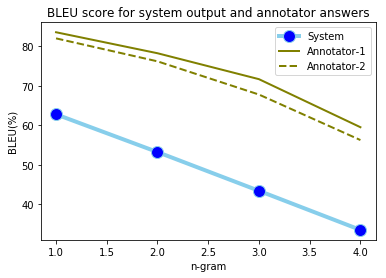

In [226]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,5), 'y1': [62.78, 53.23, 43.43, 33.54], 'y2': [83.54,78.23,71.67,59.52], 'y3': [81.99,76.18,67.78,56.27] })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="System")
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, label="Annotator-1")
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="Annotator-2")
plt.legend()
plt.title('BLEU score for system output and annotator answers')
plt.xlabel('n-gram')
plt.ylabel('BLEU(%)')
plt.savefig('bleu.png', dpi = 300)